# Exercise 4: Hamiltonian replica exchange molecular dynamics (HREMD)

In this exercise, the goal is to run a Hamiltonian replica exchange molecule dynamics (HREMD) simulation for the 4-site system and calculate its solvation free energy. This 4-site system, as shown in the figure below, is composed of 4 linearly-connected interaction sites. It has two metastable states separated by a torsional free energy barrier coupled with the alchemical variable. Specifically,
- In an unbiased simulation in the first alchemical intermediate state, the system is not able to sample both torsional metastable states.
- In an unbiased simulation in the last alchemical intermediate state, the system can sample both torsional metastable states. 

In [1]:
%%bash
# Here we remove the output of the exercise if there is any.
dirs=(state_* dhdl_files)
for dir in "${dirs[@]}"; do
    if ls -d "$dir" >/dev/null 2>&1; then
        rm -rf "$dir"
    fi
done

In [2]:
%%bash
tail -n 18 ../Inputs/4-site/HREMD.mdp

; Free energy calculation
free_energy              = yes
calc-lambda-neighbors    = -1
sc-alpha                 = 0.5
sc-power                 = 1 
couple-moltype           = LIG
couple-lambda0           = vdw
couple-lambda1           = none
couple-intramol          = no
init-lambda-state        = 0

nstdhdl                  = 100
dhdl-print-energy        = total

; lambda-states          = 1      2      3      4      5      6      7      8
coul-lambdas             = 0.00   0.30   0.65   1.00   1.00   1.00   1.00   1.00
vdw-lambdas              = 0.00   0.00   0.00   0.00   0.30   0.60   0.80   1.00
fep-lambdas              = 0.00   0.15   0.30   0.45   0.60   0.75   0.90   1.00


In [3]:
%%bash
module load gromacs/2020.2-cpu openmpi/4.0.5-gcc10.2.0

n=8      # number of alchemical intermediate states
for i in {0..7}
do
    mkdir state_${i} && cd state_${i}
    cp ../../Inputs/4-site/sys.gro .
    cp ../../Inputs/4-site/sys.top .
    cp ../../Inputs/4-site/HREMD.mdp .
    sed -i -e "s/init-lambda-state        = 0/init-lambda-state        = ${i}/g" HREMD.mdp
    mpirun -np 1 gmx_mpi grompp -f HREMD.mdp -c sys.gro -p sys.top -o HREMD.tpr && cd ../
done

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 3 Mb of data


                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 3 Mb of data



GROMACS reminds you: "Ohne Arbeit waer das Leben oede" (Wir Sind Helden)

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 3 Mb of data


                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 3 Mb of data



GROMACS reminds you: "It doesn't pay to make predictions" (Crowded House)

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 3 Mb of data


                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 3 Mb of data



GROMACS reminds you: "I Smell Smoke From a Gun Named Extinction" (Pixies)

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 3 Mb of data



GROMACS reminds you: "I Can't Shake It" (Dinosaur Jr)

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 3 Mb of data



GROMACS reminds you: "Programming today is a race between software engineers striving to build bigger and better idiot-proof programs, and the universe trying to build bigger and better idiots. So far, the universe is winning." (Rick Cook)



In [4]:
%%time
%%bash
module load gromacs/2020.2-cpu openmpi/4.0.5-gcc10.2.0
mpirun -np 8 gmx_mpi mdrun -deffnm HREMD -dhdl dhdl.xvg -replex 100 -nex 512 -multidir state_0 state_1 state_2 state_3 state_4 state_5 state_6 state_7 -noappend -ntomp 1

                  :-) GROMACS - gmx mdrun, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

CPU times: user 78 ms, sys: 14.2 ms, total: 92.2 ms
Wall time: 2min 53s


In [5]:
%%bash
mkdir dhdl_files && cd dhdl_files
for i in {0..7};
do
    mkdir state_${i}
    cp ../state_${i}/dhdl*xvg state_${i}/.
done

In [7]:
import os
import re
import glob
import natsort
import pymbar
import alchemlyb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from pymbar.timeseries import detect_equilibration, subsample_correlated_data
from alchemlyb.preprocessing import subsampling
from alchemlyb.estimators import MBAR
from alchemlyb.parsing.gmx import extract_u_nk
from alchemlyb.visualisation import plot_mbar_overlap_matrix 

# Just some settings for plotting
rc('font', **{
    'family': 'sans-serif',
    'sans-serif': ['DejaVu Sans'],
    'size': 10,
})
# Set the font used for MathJax - more on thiprint(images)
rc('mathtext', **{'default': 'regular'})
plt.rc('font', family='serif')

In [8]:
N = 8      # number of replicas
T = 300    # simulation temperature
dhdl_dir = 'dhdl_files'


folders = [f'{dhdl_dir}/state_{i}' for i in range(N)]
u_nk_data = []
for i in range(N):
    files = glob.glob(os.path.join(folders[i], '*dhdl*xvg*'))
    files = natsort.natsorted(files, reverse=False)
    print(f'  Collecting data for the following files: {", ".join(files)}')
    u_nk = alchemlyb.concat([extract_u_nk(xvg, T=T) for xvg in files])
    u_nk_series = subsampling.u_nk2series(u_nk)
    u_nk, u_nk_series = subsampling._prepare_input(u_nk, u_nk_series, drop_duplicates=True, sort=True)
    u_nk = subsampling.slicing(u_nk, step=1)
    u_nk_series = subsampling.slicing(u_nk_series, step=1)
    
    t, statinef, Neff_max = detect_equilibration(u_nk_series.values)
    u_nk_series_equil, u_nk_equil = u_nk_series[t:], u_nk[t:]
    indices = subsample_correlated_data(u_nk_series_equil, g=statinef)
    preprocessed_u_nk = u_nk_equil.iloc[indices]
    u_nk_data.append(preprocessed_u_nk)

u_nk_data = alchemlyb.concat(u_nk_data)
print('  Fitting MBAR on u_nk ...')
try:
    mbar_stop = False
    mbar = MBAR().fit(u_nk_data)
except pymbar.utils.ParameterError():
    mbar_stop = True
    print("\sum_n W_nk is not equal to 1, probably due to insufficient overlap between states.")
    print("Stop using MBAR ...")

if mbar_stop is False:
    print(f"  MBAR: {mbar.delta_f_.iloc[0, -1]:.4f} +/- {mbar.d_delta_f_.iloc[0, -1]:.4f} kT")    

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  Fitting MBAR on u_nk ...
  MBAR: -7.8363 +/- 0.2067 kT


<Axes: >

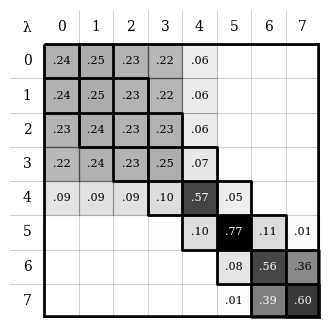

In [9]:
plot_mbar_overlap_matrix(mbar.overlap_matrix)

In [10]:
def get_HREX_trajs(log):
    """
    Parses the log file to get the state-space trajectory for each starting 
    configuraiton in a HREX simulation. As indicated in the source code "mdrun/replicaexchange.cpp",
    the "Order After Exchange" is the state label corresponding to the configuration
    that started in state listed in order, i.e. 3 0 1 2 means that the 
      - Configuration starting in state 3 (config 3) is now in state 0
      - Configuration starting in state 0 (config 0) is now in state 1
      - Configuration starting in state 1 (config 1) is now in state 2
      - Configuration starting in state 2 (config 2) is now in state 3
    Here, what we want to produce is a list of state-space trajectories with trajs[i] being
    the continuous trajectory of config i. 

    Parameters
    ----------
    log : str
        The filename of the log file to be parsed.
    
    Returns
    -------
    trajs : list
        A list of state-space trajectories.
    dt_traj : float
        Exchange period in ps.
    """
    f = open(log, 'r')
    lines = f.readlines()
    f.close()

    pattern = re.compile('Repl  There are \d+ replicas:')
    
    # First find relevant parameters
    for l in lines:
        if ' dt ' in l:
            dt = float(l.split('=')[-1]) # ps

        if 'gmx_mpi mdrun' in l:
            replex = int(l.split('-replex')[1].split()[0])

        if pattern.match(l):
            n_replicas = int(l.split('are')[-1].split('replicas')[0])
            break # this should be found last so we can break here

    trajs = [list(range(n_replicas))]  # always start from [0, 1, 2, ...]
    dt_traj = dt * replex   # exhcnage period in ps

    for l in lines:
        if 'Order After Exchange' in l:
            config_idx = [int(i) for i in l.split(':')[1].split()]
            state_idx = [config_idx.index(i) for i in range(n_replicas)]
            trajs.append(state_idx)
    trajs = np.array(trajs).T

    return trajs, dt_traj

In [12]:
trajs, dt_traj = get_HREX_trajs('state_0/HREMD.part0001.log')

In [16]:
dt_traj

0.2

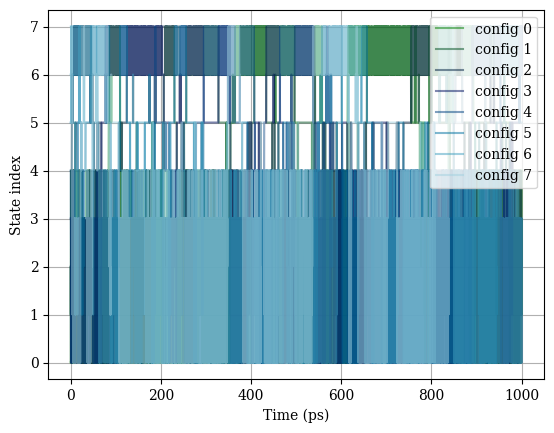

In [21]:
cmap = plt.cm.ocean
colors = [cmap(i) for i in np.arange(N) / N]

plt.figure()
for i in range(len(trajs)):
    plt.plot(np.arange(len(trajs[i])) * dt_traj, trajs[i], label=f'config {i}', alpha=0.5, color=colors[i])
    plt.xlabel('Time (ps)')
    plt.ylabel('State index')
    plt.legend()
plt.grid()

In [34]:
%%bash
echo 'theta: TORSION ATOMS=1,2,3,4
PRINT ARG=theta FILE=theta.dat STRIDE=1
' > plumed_theta.dat

In [26]:
import subprocess
# define the PLUMED binary
plumed_bin="singularity exec /ocean/projects/see220002p/shared/icomse_cpu.sif plumed"

# Define a function that helps us run PLUMED commands
def run_plumed_cmd(cmd,verbose=False):
    cmd_str="{} ".format(plumed_bin)+cmd
    print("PLUMED command: {}".format(cmd_str))
    if verbose:
        subprocess.run(cmd_str.split())
    else:
        subprocess.run(cmd_str.split(),stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

In [24]:
%%bash
cat plumed_theta.dat


theta: TORSION ATOMS=1,2,3,4
PRINT ARG=theta FILE=theta.dat STRIDE=1



In [47]:
run_plumed_cmd('driver --mf_xtc state_7/HREMD.part0001.xtc --plumed plumed_theta.dat', verbose=True)

PLUMED command: singularity exec /ocean/projects/see220002p/shared/icomse_cpu.sif plumed driver --mf_xtc state_7/HREMD.part0001.xtc --plumed plumed_theta.dat

DRIVER: Found molfile format trajectory xtc with name state_7/HREMD.part0001.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.2 (git: Unknown) compiled on Mar 13 2023 at 13:57:47
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /opt/conda/lib/plumed
PLUMED: For installed feature, see /opt/conda/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 4
PLUMED: File suffix: 
PLUMED: FILE: plumed_theta.dat
PLUMED: Action TORSION
PLUMED:   with label theta
PLUMED:   between atoms 1 2 3 4
PLUMED:   using periodic boundary conditions
PLUMED: Action PRINT
PLUMED:   with labe

In [48]:
data = np.transpose(np.loadtxt('theta.dat', comments=['#!']))

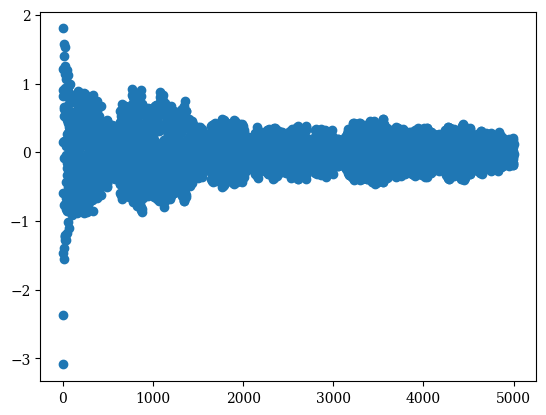

In [52]:
plt.scatter(data[0], data[1])